In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df =pd.read_csv("file:///Users/tmatembo/Downloads/datasets_33180_43520_heart.csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
print("number of rows in data set are:",df.shape[0])
print("number of columns in data set are:",df.shape[1])

number of rows in data set are: 303
number of columns in data set are: 14


#Problem_Defination: 

Here we have to develop a predictive model where it could predict whether a patient has a heart disease or not.

So as per the problem defination we can understand that it is a supervised model that we are developing and the problem is classification problem.
here the shape of the data is 303 rows and 14 columns

In [15]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here, we got the range of the values in each column. we can see the mean,standard_deviation,minimum,maximum,25,50(median) and 75 percentile values for each individual columns.

In [17]:
df.corr().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,-0.0984,-0.0687,0.279,0.214,0.121,-0.116,-0.399,0.0968,0.21,-0.169,0.276,0.068,-0.225
sex,-0.0984,1.0,-0.0494,-0.0568,-0.198,0.045,-0.0582,-0.044,0.142,0.0961,-0.0307,0.118,0.21,-0.281
cp,-0.0687,-0.0494,1.0,0.0476,-0.0769,0.0944,0.0444,0.296,-0.394,-0.149,0.12,-0.181,-0.162,0.434
trestbps,0.279,-0.0568,0.0476,1.0,0.123,0.178,-0.114,-0.0467,0.0676,0.193,-0.121,0.101,0.0622,-0.145
chol,0.214,-0.198,-0.0769,0.123,1.0,0.0133,-0.151,-0.00994,0.067,0.054,-0.00404,0.0705,0.0988,-0.0852
fbs,0.121,0.045,0.0944,0.178,0.0133,1.0,-0.0842,-0.00857,0.0257,0.00575,-0.0599,0.138,-0.032,-0.028
restecg,-0.116,-0.0582,0.0444,-0.114,-0.151,-0.0842,1.0,0.0441,-0.0707,-0.0588,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.0467,-0.00994,-0.00857,0.0441,1.0,-0.379,-0.344,0.387,-0.213,-0.0964,0.422
exang,0.0968,0.142,-0.394,0.0676,0.067,0.0257,-0.0707,-0.379,1.0,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.21,0.0961,-0.149,0.193,0.054,0.00575,-0.0588,-0.344,0.288,1.0,-0.578,0.223,0.21,-0.431


By this Heat map - we have the correlation values between columns.

We don't have any redundant columns,ie.we dont have highly correlated columns, which can be removed.
All the columns are lying between low positive correlation to low negative correlation.
Most of the columns have negative correlation(column value increase will decrease the target value) with the target variable.

## Exploratory Data Analysis

1.BOX WHISKER PLOT-

This is for looking outliers in the columns.
This gives a five number summary[min,25,median,75,max] among the data values in a column.
used to compare available data among two to three features.

Text(0.5, 1.0, '0: No Angina, 1:Angina | 0:NO Heart Disease,1:Heart Disease')

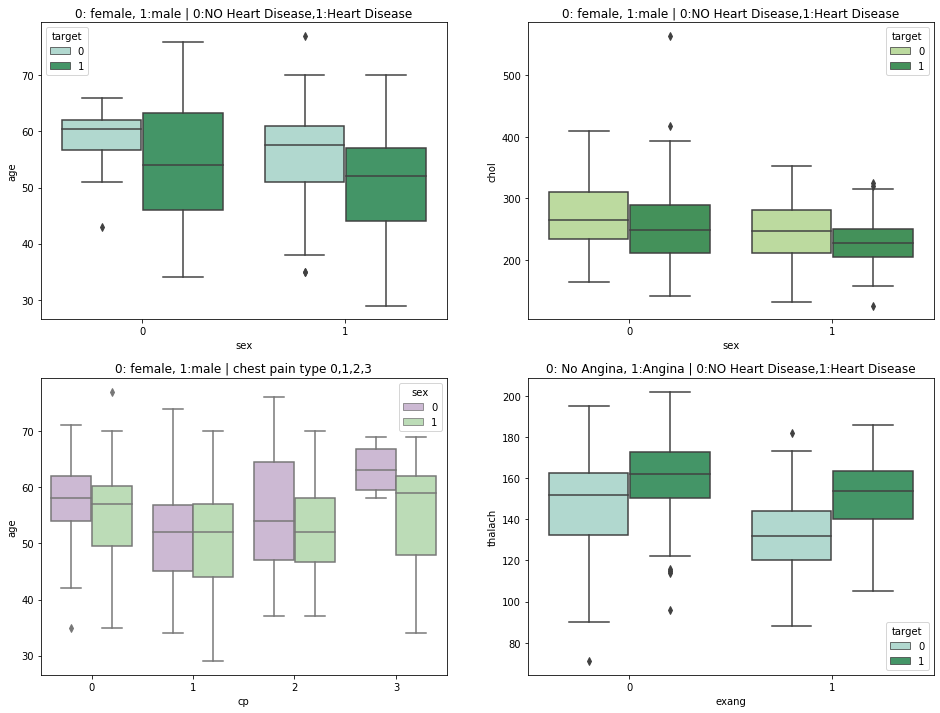

In [18]:
fig,ax=plt.subplots(figsize=(16,12))
plt.subplot(221)
b1=sns.boxplot(x="sex",y="age",hue="target",data=df,palette="BuGn")
b1.set_title("0: female, 1:male | 0:NO Heart Disease,1:Heart Disease")


plt.subplot(222)
b2=sns.boxplot(x="sex",y="chol",hue="target",data=df,palette="YlGn")
b2.set_title("0: female, 1:male | 0:NO Heart Disease,1:Heart Disease")


plt.subplot(223)
b3=sns.boxplot(x="cp",y="age",hue="sex",data=df,palette="PRGn")
b3.set_title("0: female, 1:male | chest pain type 0,1,2,3")


plt.subplot(224)
b4=sns.boxplot(x="exang",y="thalach",hue="target",data=df,palette="BuGn")
b4.set_title("0: No Angina, 1:Angina | 0:NO Heart Disease,1:Heart Disease")

b1(sex/age/target): This is to find out Heart diseases for different age groups among male and female.

Heart diseases comes at earlier ages in males than females.
Females are prone to heart diseases in wider age periods while compared to males.
we have outliers for age in both males and females with no heart diseases.
b2(sex/chol/target): This is to depict heart disease among male and female with cholestral.

we have outliers for male and female heart disease patients with cholestrol.
compared to male cholestrol ,female cholestrol has a wide range that has heart disease.
b3(cp/age/sex): This depicts the chest pain types among diferent ages in male and female.

Type 1 is early ages in both males and females.
Type 2 is common among wide range of age groups among females compared to males.
Type 3 is common among wide range of age groups among males while compared to females.
Most of the chest pain types are observed in early ages for males while compared to females.
b4(exang/thalach/target): This depicts the Maximum Heart rate of the chest pain(angina) caused by exercise in heart disease patients.

Even though people without angina just with maximum heart rate could result in heart diseases.
people without exang(no angina) who is having heart disease have outliers.
People with out heart disease and without exang have outlier.
people with out heart disease and with exang have outlier

2.COUNT PLOT-

This is used to show the counts of the variables
This can be used to depict 2 -3 variables.

Text(0.5, 1.0, 'Resting electrocardiographic results ')

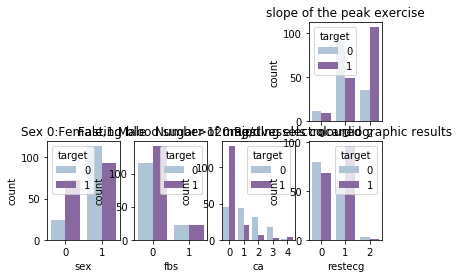

In [20]:
s3=sns.countplot(x='thal',data=df,hue='target',palette='BuPu',linewidth=3)
s3.set_title('Thal')


plt.subplot(244)
s4=sns.countplot(x='slope',data=df,hue='target',palette='BuPu',linewidth=3)
s4.set_title('slope of the peak exercise')

plt.subplot(245)
s5=sns.countplot(x='sex',data=df,hue='target',palette='BuPu',linewidth=3)
s5.set_title('Sex 0:Female,1:Male')

plt.subplot(246)
s6=sns.countplot(x='fbs',data=df,hue='target',palette='BuPu',linewidth=3)
s6.set_title('Fasting blood sugar>120mg/dl')

plt.subplot(247)
s7=sns.countplot(x='ca',data=df,hue='target',palette='BuPu',linewidth=3)
s7.set_title('Number of major vessels coloured')

plt.subplot(248)
s8=sns.countplot(x='restecg',data=df,hue='target',palette='BuPu',linewidth=3)
s8.set_title('Resting electrocardiographic results ')

This depicts the count plots for various features.

1.-s1(taget/sex)

There are more male observations than female observations in the dataset.
Out of the female observations in the dataset more than 70% have a heart disease.where as that of male observation there are less than 50% of the observations have heart diseases.
2-s2(cp/target)

There are more than 60% of chest pain type 0 doesn't have heart diseases.
There are approximately 70% of chest pain type 1 have Heart diseases.
There are more than 70% of chest pain type 2 have Heart diseases.
There are appromately 50% of chest pain type 3 have Heart Diseases.
3.s3(thal/target)*

people with thal 2 have highest chance of heart disease.
people with thal 3 have lowest chance of heart disease.
4.s4(slope/target)

Slope 2 has highest heart diseases.
Slope 1 has approximately 40% of heart diseases.
5.s6(fbs/target)

around 50% of fbs>120mg/dl have heart diseases.
More than half of people who have fbs<120mg/dl have heart diseases
6.s7(ca/target)

Approximately 75% of heart diseased people have ca 0.
s8(restecg/target)
Above 60% of restecg 1 have heart diseases.
Less than 50% of restecg 0 have heart diseases

3.BAR PLOT-

This helps in finding the relationship between categorical and discrete variables.
This also can be used to know relation between two continuos variable with binary data


Text(0.5, 1.0, 'Exang 0:No Angina,1:Yes Angina')

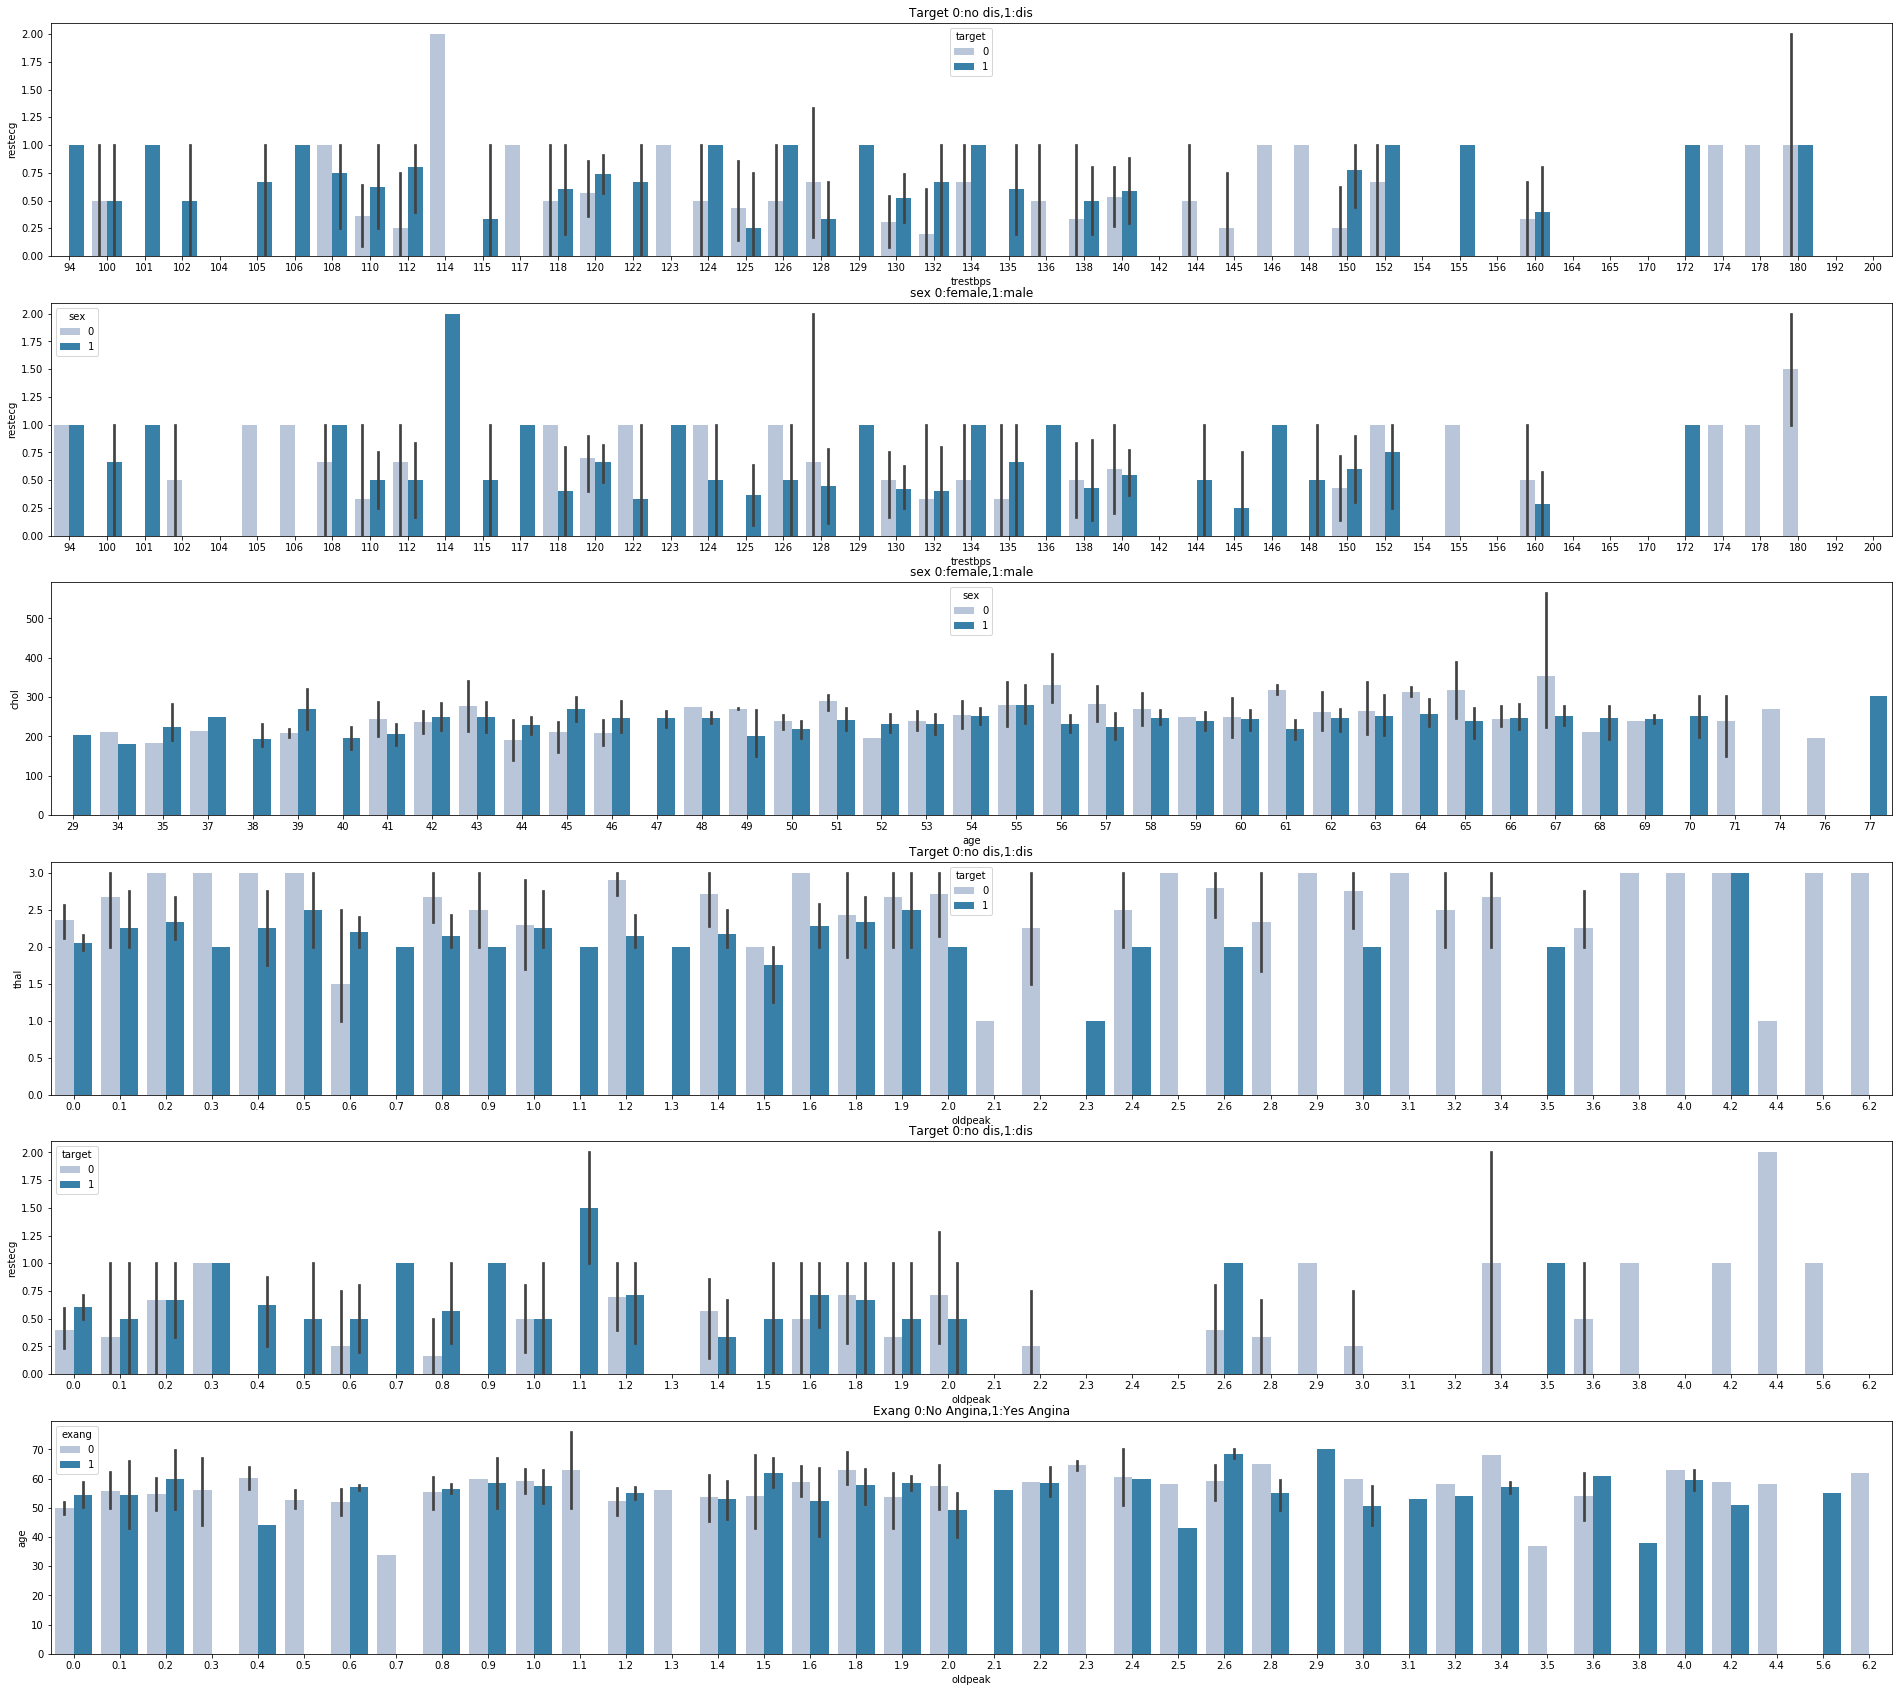

In [21]:
fig,ax=plt.subplots(figsize=(33,30))
plt.subplot(611)
bx_1 = sns.barplot(x="trestbps", y="restecg", hue="target", data=df,palette="PuBu")
bx_1.set_title("Target 0:no dis,1:dis")

plt.subplot(612)
bx_2 = sns.barplot(x="trestbps", y="restecg", hue="sex", data=df,palette="PuBu")
bx_2.set_title("sex 0:female,1:male")

plt.subplot(613)
bx_3 = sns.barplot(x="age", y="chol", hue="sex", data=df,palette="PuBu")
bx_3.set_title("sex 0:female,1:male")

plt.subplot(614)
bx_4 = sns.barplot(x="oldpeak", y="thal", hue="target", data=df,palette="PuBu")
bx_4.set_title("Target 0:no dis,1:dis")

plt.subplot(615)
bx_5 = sns.barplot(x="oldpeak", y="restecg", hue="target", data=df,palette="PuBu")
bx_5.set_title("Target 0:no dis,1:dis")

plt.subplot(616)
bx_6 = sns.barplot(x="oldpeak", y="age", hue="exang", data=df,palette="PuBu")
bx_6.set_title("Exang 0:No Angina,1:Yes Angina")

.bx_1 &bx_2(restecg,trestbps,target,sex)

At trestbps 94 and restecg 1.00 it is clear that they have heart diseases irrespective of sex.
2.bx_3(chol/age/sex)

There are more females who have higher cholestrals at the ages above 47 to 67 while compared to males.
Overall, There are more men who have higher cholestrals below 48 while compared to females.
3.bx_4(oldpeak/thal/target)

There are less heart disease patients oldpeak above 2.0 compare to oldpeak less than 2.0

4.SCATTER PLOT

It is used to find the relationship between 2 variables.
It helps to find outliers and correaltion between features.

([<matplotlib.axis.XTick at 0x7fc21fa02410>,
 <a list of 5 Text xticklabel objects>)

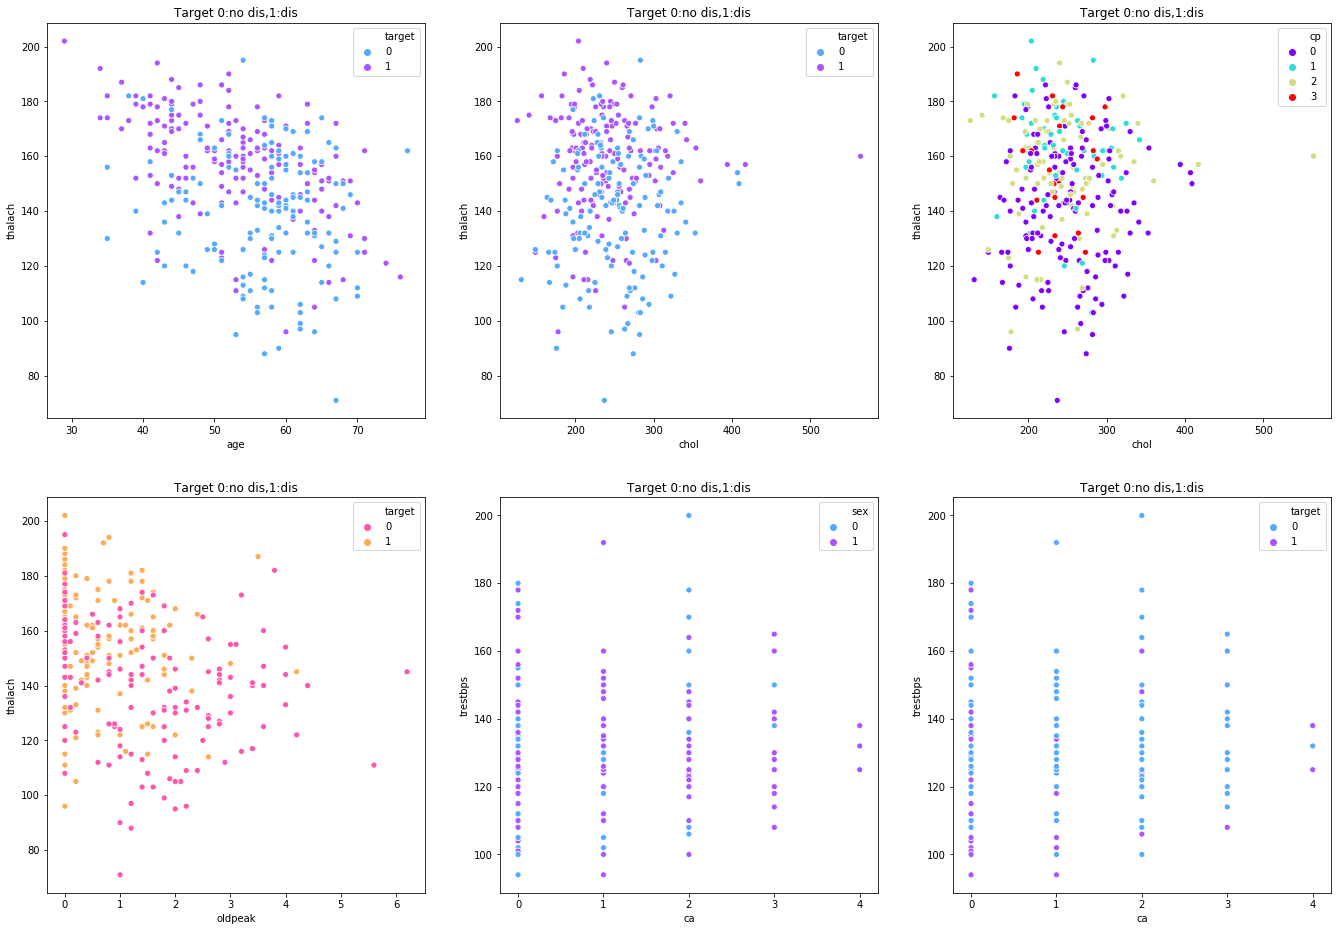

In [22]:
fig,ax=plt.subplots(figsize=(23,16))
plt.subplot(231)
sp_1 = sns.scatterplot(x="age", y="thalach",hue="target",data=df,palette="cool")
sp_1.set_title("Target 0:no dis,1:dis")
plt.subplot(232)
sp_2 = sns.scatterplot(x="chol", y="thalach",hue="target",data=df,palette="cool")
sp_2.set_title("Target 0:no dis,1:dis")
plt.subplot(233)
sp_3 = sns.scatterplot(x="chol", y="thalach",hue="cp",data=df,palette="rainbow")
sp_3.set_title("Target 0:no dis,1:dis")
plt.subplot(234)
sp_3 = sns.scatterplot(x="oldpeak", y="thalach",hue="target",data=df,palette="spring")
sp_3.set_title("Target 0:no dis,1:dis")
plt.subplot(235)
sp_3 = sns.scatterplot(x="ca", y="trestbps",hue="sex",data=df,palette="cool")
sp_3.set_title("Target 0:no dis,1:dis")
plt.xticks([0,1, 2, 3, 4])
plt.subplot(236)
sp_3 = sns.scatterplot(x="ca", y="trestbps",hue="target",data=df,palette="cool")
sp_3.set_title("Target 0:no dis,1:dis")
plt.xticks([0,1, 2, 3, 4])

5.POINT PLOT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 <a list of 91 Text xticklabel objects>)

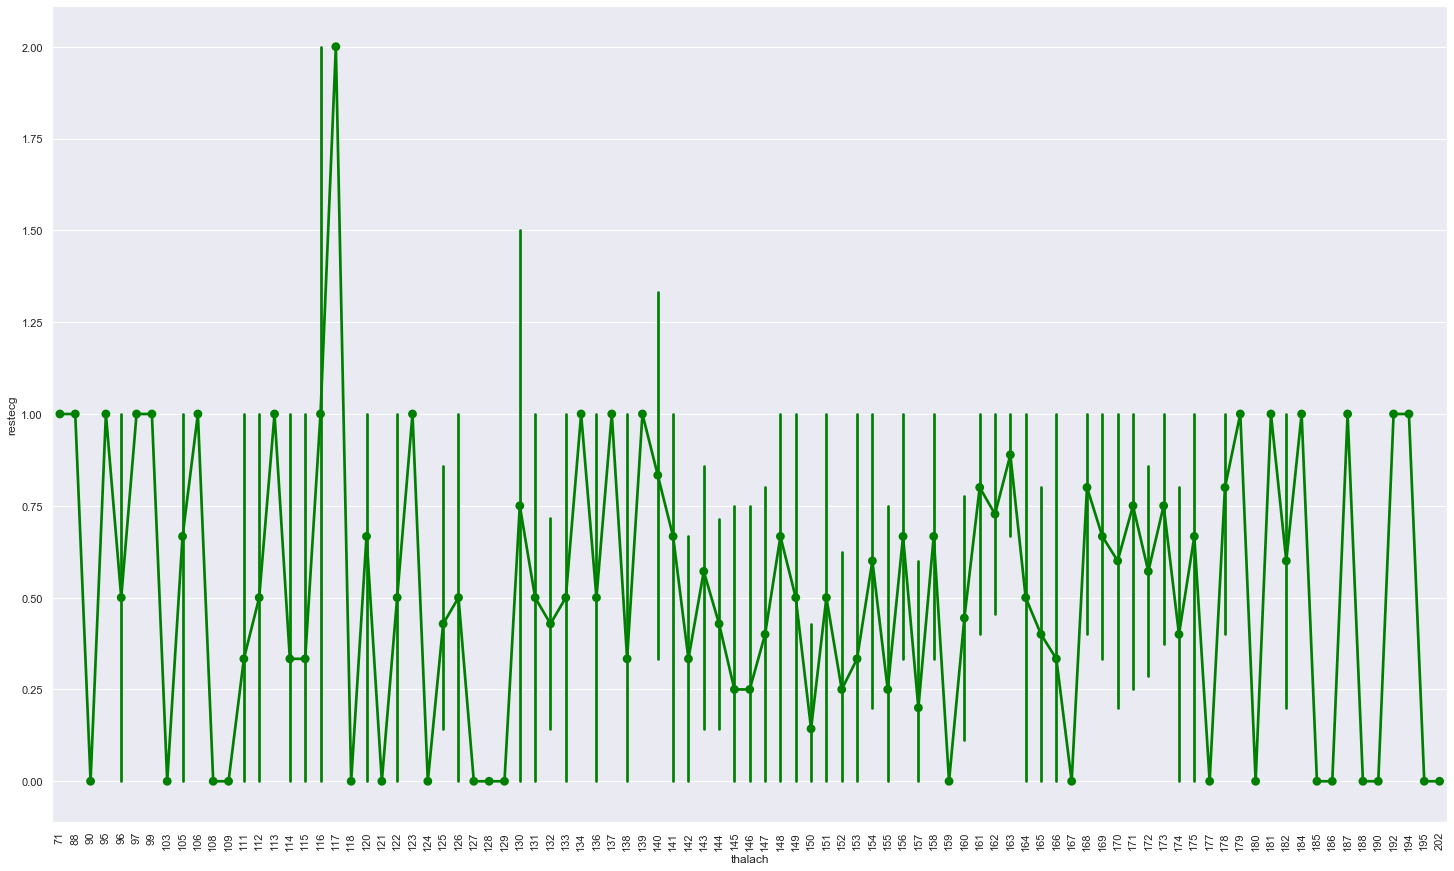

In [23]:
sns.set(style="darkgrid")
f,ax = plt.subplots(figsize = (25,15))
sns.pointplot(x = "thalach",y = 'restecg',data = df,color = "green",alpha = .6)
plt.xticks(rotation=90)

6.LM PLOT

It is the linear regression model(and its uncertainity) kind of visualizing.

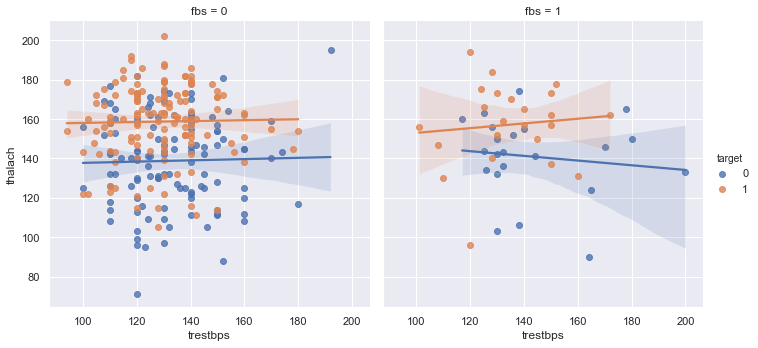

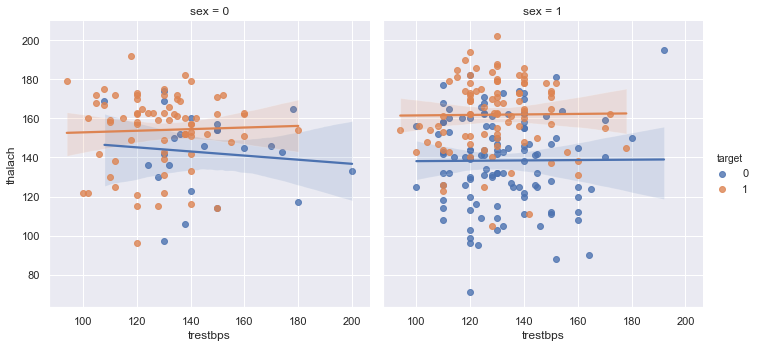

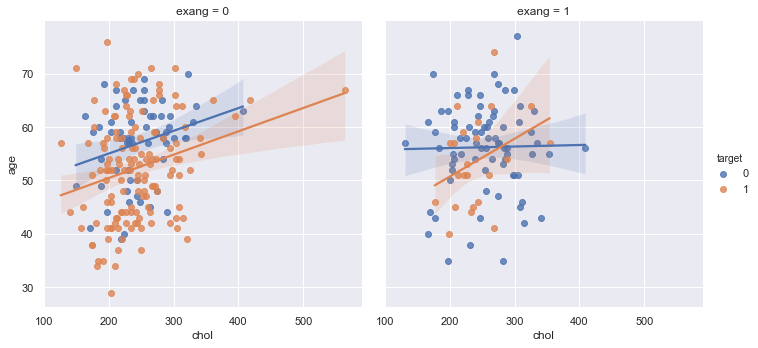

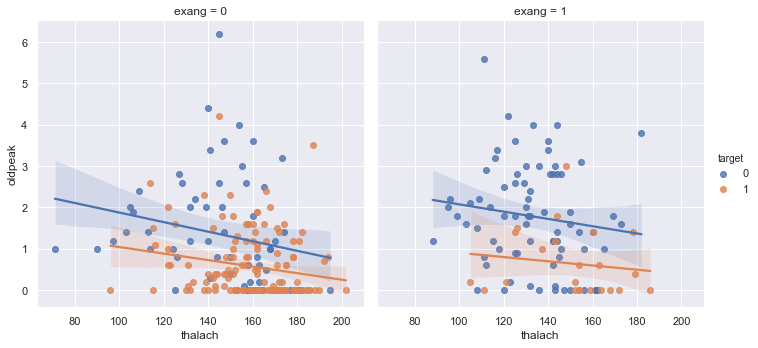

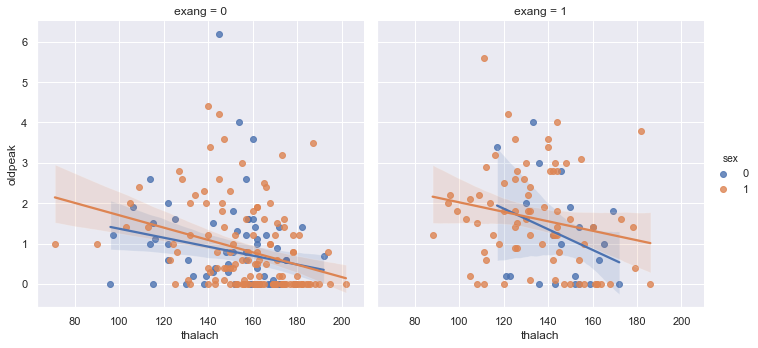

In [24]:
sns.lmplot(x="trestbps", y="thalach", col="fbs", hue="target",
           data=df)
sns.lmplot(x="trestbps", y="thalach", col="sex", hue="target",
           data=df)
sns.lmplot(x="chol", y="age", col="exang", hue="target",
           data=df)
sns.lmplot(x="thalach", y="oldpeak", col="exang", hue="target",
           data=df)
sns.lmplot(x="thalach", y="oldpeak", col="exang", hue="sex",
           data=df)

7.PAIR PLOT

This can be drawn to find the relationship of multiple features with respect to each other

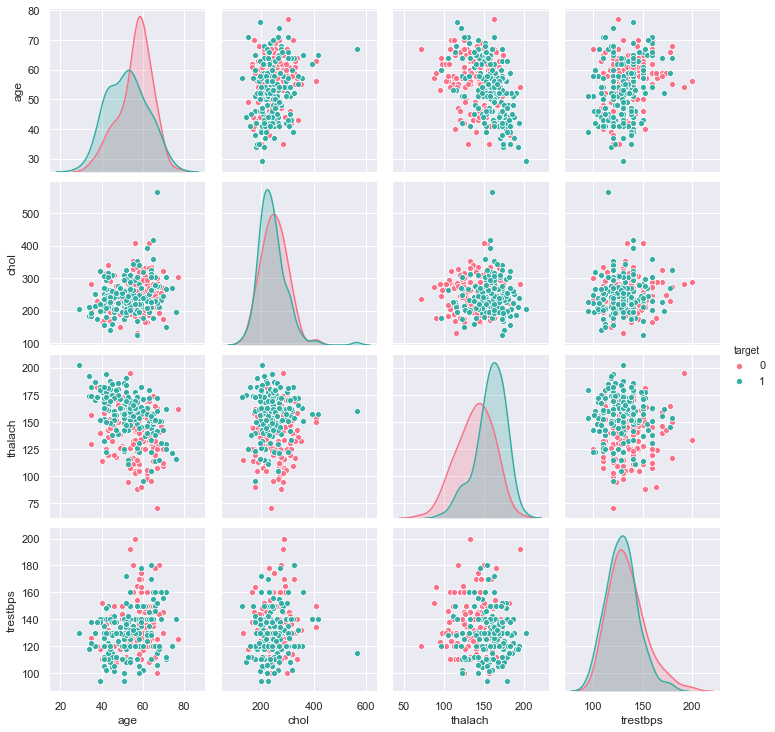

In [25]:
sns.pairplot(df,hue="target",vars=["age","chol","thalach","trestbps"],palette="husl")

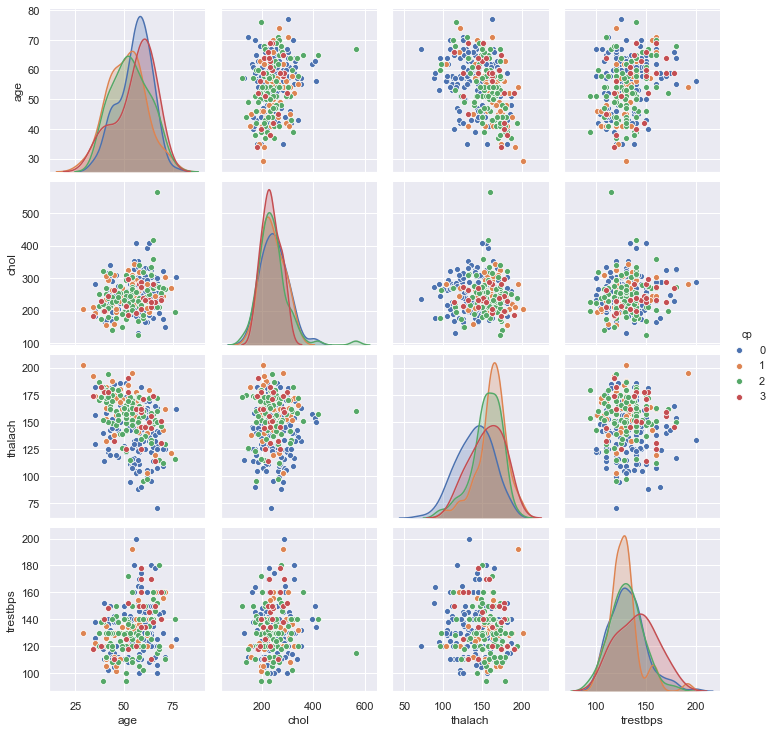

In [26]:
sns.pairplot(df,hue="cp",vars=["age","chol","thalach","trestbps"])

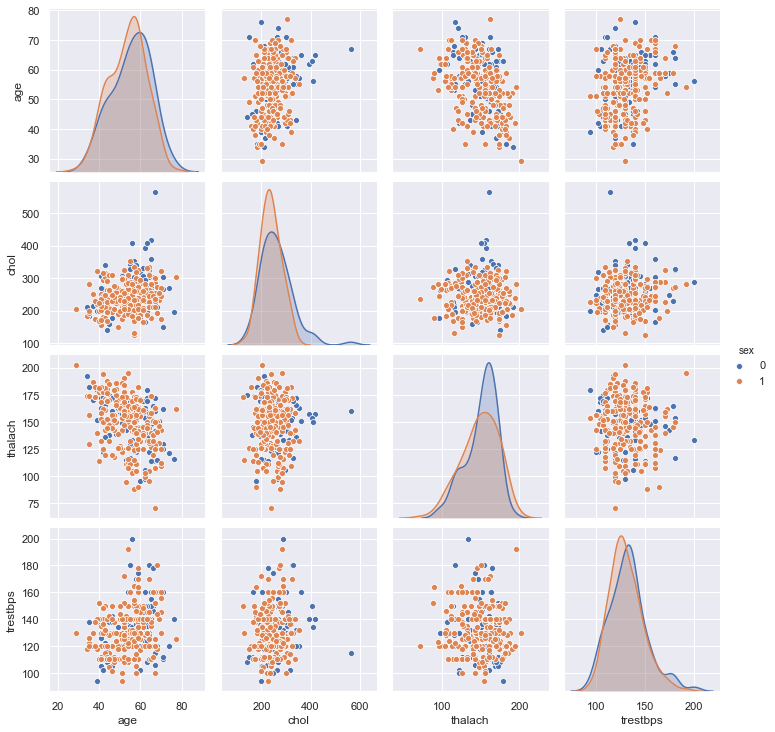

In [27]:
sns.pairplot(df,hue="sex",vars=["age","chol","thalach","trestbps"])

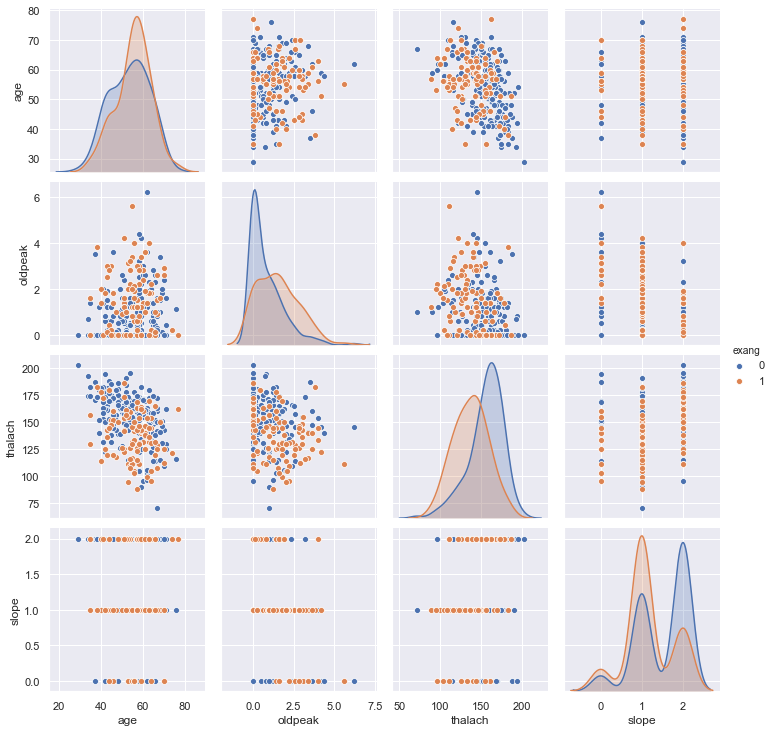

In [28]:
sns.pairplot(df,hue="exang",vars=["age","oldpeak","thalach","slope"])

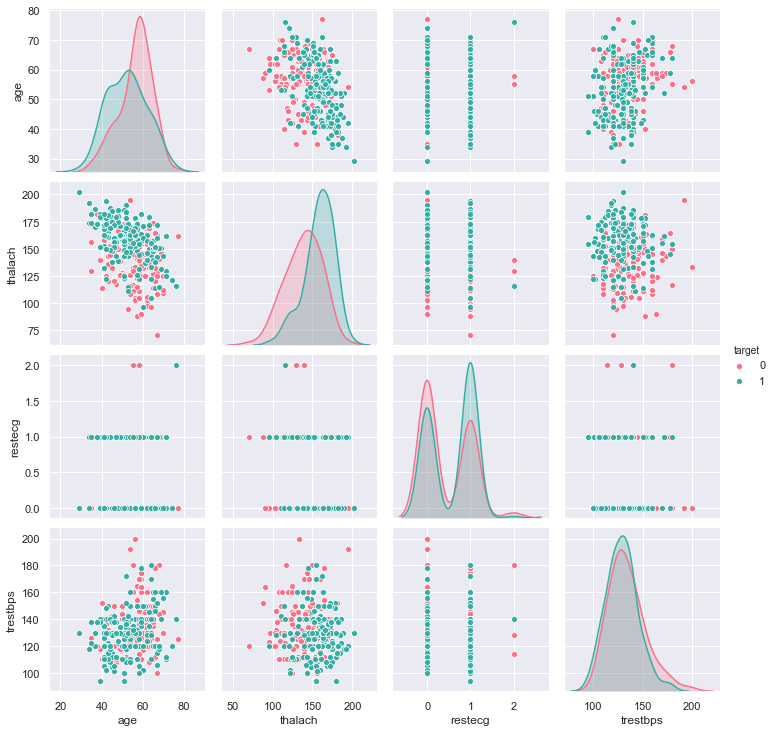

In [29]:
sns.pairplot(df,hue="target",vars=["age","thalach","restecg","trestbps"],palette="husl")

8.JOINTPLOT

This is drawn between two features.

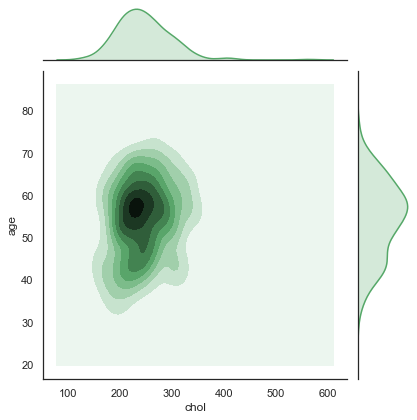

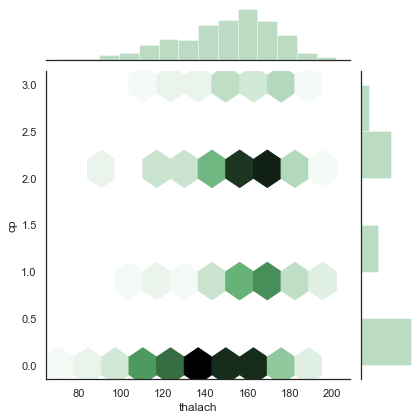

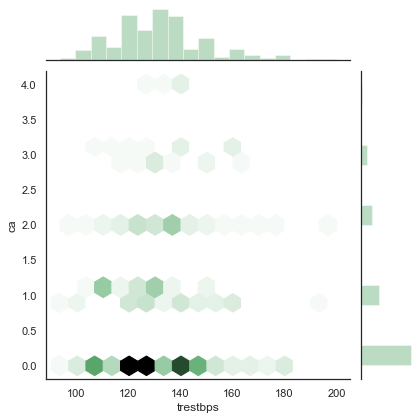

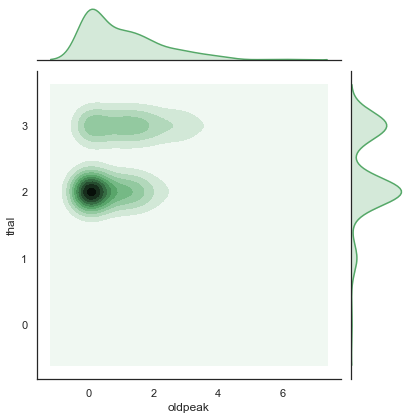

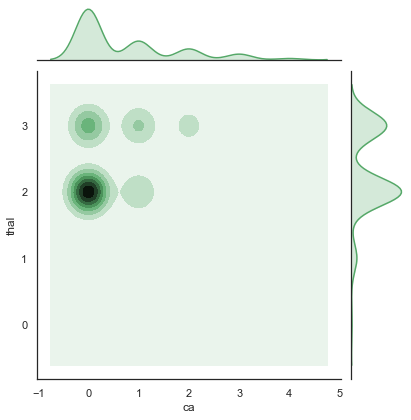

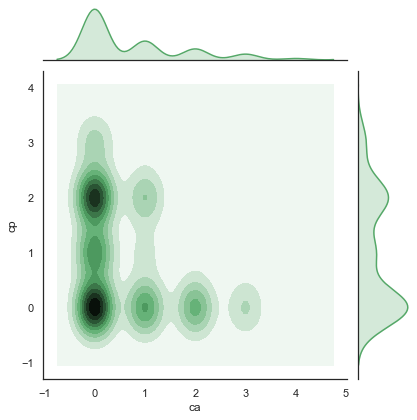

In [30]:
sns.set(style="white")
sns.jointplot(x="chol",y="age",kind="kde",color="g",data=df)


sns.set(style="white")
sns.jointplot(x="thalach",y="cp",kind="hex",color="g",data=df)

sns.set(style="white")
sns.jointplot(x="trestbps",y="ca",kind="hex",color="g",data=df)


sns.set(style="white")
sns.jointplot(x="oldpeak",y="thal",kind="kde",color="g",data=df)


sns.set(style="white")
sns.jointplot(x="ca",y="thal",kind="kde",color="g",data=df)


sns.set(style="white")
sns.jointplot(x="ca",y="cp",kind="kde",color="g",data=df)

9.CAT PLOT

This plot combines facetgrid and swarmplot.

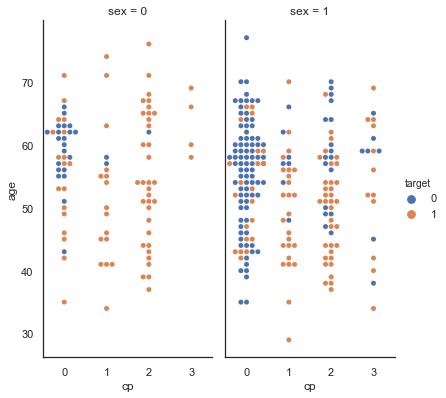

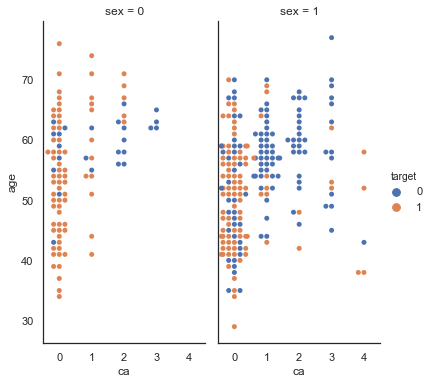

In [33]:
sns.catplot(x="cp", y="age",hue="target", col="sex",data=df, kind="swarm",height=5.7, aspect=.5)

sns.catplot(x="ca", y="age",hue="target", col="sex",data=df, kind="swarm",height=5.5, aspect=.5)